In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from bokeh.io import output_notebook
from bokeh.plotting import figure, output_file, show
from bokeh.io import curdoc
from bokeh.models.glyphs import Text
from bokeh.models import DatetimeTickFormatter
from bokeh.models import BoxAnnotation
from datetime import datetime as dt
from bokeh.models import Span
from bokeh.models import Title
from bokeh.models import DatetimeTickFormatter

curdoc().theme = 'light_minimal'

df = pd.read_csv('../dados/dados_limpos/base_limpa_junho_2021.csv', sep=',', encoding="latin-1")
df['OCORRENCIA_DATA'] = pd.to_datetime(df['OCORRENCIA_DATA'])
df['OCORRENCIA_HORA'] = pd.to_datetime(df['OCORRENCIA_HORA'])
df['OCORRENCIA_DATA'] = df.OCORRENCIA_DATA.dt.normalize() # Para retirar o horário
df = df[(df['OCORRENCIA_ANO'] >= 2019)]
# df = df[(df['OCORRENCIA_ANO'] == 2019) | (df['OCORRENCIA_ANO'] == 2020)]
df = df[df['REGIONAL'] != 'REGIÃO METROPOLITANA']


# Abrindo o arquivo com as informações de população por regional
populacao = pd.read_csv("../dados/dados_limpos/renda_media_regionais.csv")

# Define o período de agrupamento
df['periodo'] = df.OCORRENCIA_DATA.dt.to_period("M")
df.sample(3)

,ATENDIMENTO_ANO,BAIRRO,LOCAL_PUBLICO,RUA,DESCRICAO1,DESCRICAO2,SUBCATEGORIA,OCORRENCIA_ANO,OCORRENCIA_MES,OCORRENCIA_DATA,OCORRENCIA_HORA,OCORRENCIA_DIA_SEMANA,ORIGEM_CHAMADO_DESCRICAO,REGIONAL,QTDE,periodo
197590,2021,JARDIM BOTÂNICO,NÃO INFORMADO,PRESIDENTE AFFONSO CAMARGO,Encaminhamento,Atitude Suspeita (Abordagem),Encaminhamento de foragido (mandado de busca e...,2021,3,2021-03-17,2021-07-10 09:50:00,QUARTA,IMEDIATA,MATRIZ,1,2021-03
196711,2021,UBERABA,NÃO INFORMADO,PROFESSOR FRANCISCO MENDES,Trânsito,NÃO INFORMADO,Acidente de trânsito,2021,3,2021-03-14,2021-07-10 05:16:00,DOMINGO,CIOSP (190),CAJURU,1,2021-03
130497,2020,CENTRO,NÃO INFORMADO,SÃO FRANCISCO,Atitude Suspeita (Abordagem),NÃO INFORMADO,NÃO INFORMADO,2020,1,2020-01-28,2021-07-10 13:10:00,TERÇA,IMEDIATA,MATRIZ,1,2020-01


In [55]:
df['REGIONAL'].unique()

array(['PINHEIRINHO', 'SANTA FELICIDADE', 'CIC', 'BOQUEIRÃO',
       'BAIRRO NOVO', 'BOA VISTA', 'MATRIZ', 'CAJURU', 'PORTÃO',
       'TATUQUARA'], dtype=object)

In [2]:
df = df[(df['REGIONAL'] == 'TATUQUARA')\
        | (df['REGIONAL'] == 'BAIRRO NOVO')\
        | (df['REGIONAL'] == 'MATRIZ')\
        | (df['REGIONAL'] == 'PORTÃO')
       ]
df['REGIONAL'].unique()

array(['BAIRRO NOVO', 'MATRIZ', 'PORTÃO', 'TATUQUARA'], dtype=object)

In [3]:

violencia = df[(df["DESCRICAO1"] == "Violação de Medida Protetiva Lei Maria da Penha") | \
               ((df["DESCRICAO1"] != "Violação de Medida Protetiva Lei Maria da Penha") & (df["DESCRICAO2"] == "Violação de Medida Protetiva Lei Maria da Penha")) |\
               (df["DESCRICAO1"] == "Importunação\xa0sexual") |\
               (df["DESCRICAO1"] == "Estupro") |\
               (df["DESCRICAO1"] == "Exploração de menores") |\
               (df["DESCRICAO1"] == "Maus tratos à pessoas") |\
               (df["DESCRICAO1"] == "Abuso de incapazes")]

# Matriz e Portão

In [5]:
matriz = violencia[df['REGIONAL'] == 'MATRIZ']
portao = violencia[df['REGIONAL'] == 'PORTÃO']

matriz_grouped = matriz.groupby(['periodo', 'DESCRICAO1'])['QTDE'].count().reset_index()
portao_grouped = portao.groupby(['periodo', 'DESCRICAO1'])['QTDE'].count().reset_index()

<ipython-input-5-fd992645967b>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matriz = violencia[df['REGIONAL'] == 'MATRIZ']
<ipython-input-5-fd992645967b>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  portao = violencia[df['REGIONAL'] == 'PORTÃO']


In [8]:
matriz_maria_da_penha = matriz_grouped[matriz_grouped['DESCRICAO1'] == 'Violação de Medida Protetiva Lei Maria da Penha']
portao_maria_da_penha = portao_grouped[portao_grouped['DESCRICAO1'] == 'Violação de Medida Protetiva Lei Maria da Penha']
# matriz_grouped
matriz_maria_da_penha

print(len(matriz_maria_da_penha), len(portao_maria_da_penha))

30 30


In [8]:
matriz_grouped.loc[matriz_grouped.DESCRICAO1 == 'Maus tratos à pessoas', 'DESCRICAO1'] = 'Outros'
matriz_grouped.loc[matriz_grouped.DESCRICAO1 == 'Exploração de menores', 'DESCRICAO1'] = 'Outros'
matriz_grouped.loc[matriz_grouped.DESCRICAO1 == 'Abuso de incapazes', 'DESCRICAO1'] = 'Outros'
matriz_grouped.loc[matriz_grouped.DESCRICAO1 == 'Ameaça', 'DESCRICAO1'] = 'Outros'
matriz_grouped.loc[matriz_grouped.DESCRICAO1 == 'Agressão física/verbal', 'DESCRICAO1'] = 'Outros'
matriz_grouped.loc[matriz_grouped.DESCRICAO1 == 'Violação de Medida Protetiva Lei Maria da Penha', 'DESCRICAO1'] = 'Violação Lei Maria da Penha'




matriz_grouped_pie = matriz_grouped.groupby('DESCRICAO1')['QTDE'].sum().reset_index()
# # tatuquara_grouped_pie


portao_grouped.loc[portao_grouped.DESCRICAO1 == 'Maus tratos à pessoas', 'DESCRICAO1'] = 'Outros'
portao_grouped.loc[portao_grouped.DESCRICAO1 == 'Estupro', 'DESCRICAO1'] = 'Outros'
portao_grouped.loc[portao_grouped.DESCRICAO1 == 'Abuso de incapazes', 'DESCRICAO1'] = 'Outros'
portao_grouped.loc[portao_grouped.DESCRICAO1 == 'Violação de Medida Protetiva Lei Maria da Penha', 'DESCRICAO1'] = 'Violação Lei Maria da Penha'

portao_grouped_pie = portao_grouped.groupby('DESCRICAO1')['QTDE'].sum().reset_index()
portao_grouped_pie




,DESCRICAO1,QTDE
0,Importunação sexual,9
1,Outros,3
2,Violação Lei Maria da Penha,122


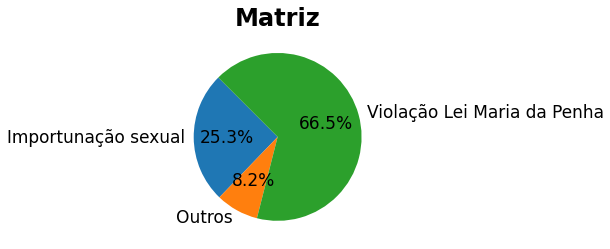

In [266]:
fig, ax = plt.subplots(figsize=(8,8))  
# colors = ['gray','orange','green','red','purple', 'brown','cyan', 'violet']
labels = matriz_grouped_pie['DESCRICAO1']
explode = (0.1,0,0.1,0,0.1,0,0.1) 
ax.pie(matriz_grouped_pie['QTDE'],autopct='%.1f%%', startangle=135, labels=labels, textprops={'fontsize': 17})
ax.set_title("Matriz",fontdict={'fontsize': 24, 'fontweight': 'bold'})

fig.tight_layout()
# fig1.suptitle('Public Opinion on CTQ-measures', fontsize=20, y=1.07, fontweight='bold', x=0.37)
plt.show()

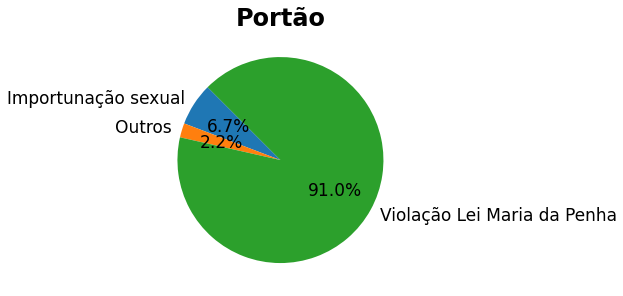

In [268]:
fig, ax = plt.subplots(figsize=(8,8))  
# colors = ['gray','orange','green','red','purple', 'brown','cyan', 'violet']
labels = portao_grouped_pie['DESCRICAO1']
explode = (0.1,0,0.1,0,0.1,0,0.1) 
ax.pie(portao_grouped_pie['QTDE'],autopct='%.1f%%', startangle=135, labels=labels, textprops={'fontsize': 17})
ax.set_title("Portão",fontdict={'fontsize': 24, 'fontweight': 'bold'})

fig.tight_layout()
# fig1.suptitle('Public Opinion on CTQ-measures', fontsize=20, y=1.07, fontweight='bold', x=0.37)
plt.show()



# Tatuquara

In [9]:
tatuquara = violencia[df['REGIONAL'] == 'TATUQUARA']
tatuquara_grouped = tatuquara.groupby(['periodo', 'DESCRICAO1'])['QTDE'].count().reset_index()

tatuquara_grouped.loc[tatuquara_grouped.DESCRICAO1 == 'Abuso de incapazes', 'DESCRICAO1'] = 'Outros'
tatuquara_grouped.loc[tatuquara_grouped.DESCRICAO1 == 'Estupro', 'DESCRICAO1'] = 'Outros'
tatuquara_grouped.loc[tatuquara_grouped.DESCRICAO1 == 'Exploração de menores', 'DESCRICAO1'] = 'Outros'
tatuquara_grouped.loc[tatuquara_grouped.DESCRICAO1 == 'Importunação\xa0sexual', 'DESCRICAO1'] = 'Outros'
tatuquara_grouped.loc[tatuquara_grouped.DESCRICAO1 == 'Maus tratos à pessoas', 'DESCRICAO1'] = 'Outros'
tatuquara_grouped.loc[tatuquara_grouped.DESCRICAO1 == 'Tentativa', 'DESCRICAO1'] = 'Outros'
tatuquara_grouped.loc[tatuquara_grouped.DESCRICAO1 == 'Violação de Medida Protetiva Lei Maria da Penha', 'DESCRICAO1'] = 'Violação Lei Maria da Penha'





tatuquara_grouped_pie = tatuquara_grouped.groupby('DESCRICAO1')['QTDE'].sum().reset_index()
tatuquara_grouped_pie

<ipython-input-9-d24b812bb8ef>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tatuquara = violencia[df['REGIONAL'] == 'TATUQUARA']


,DESCRICAO1,QTDE
0,Outros,6
1,Violação Lei Maria da Penha,170


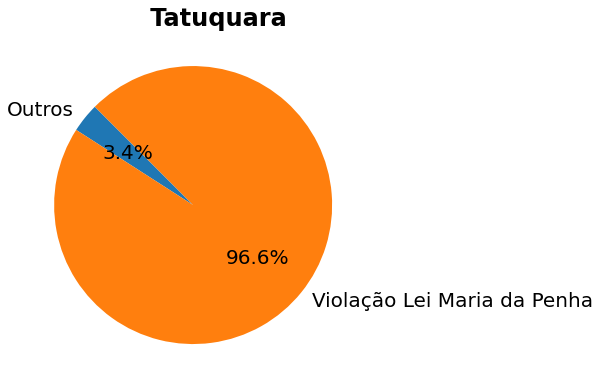

In [278]:
fig1, ax1 = plt.subplots(figsize=(8,8))  # 
labels=tatuquara_grouped_pie['DESCRICAO1']

# explode = (0.1,0,0.1,0,0.1,0,0.1) 
ax1.pie(tatuquara_grouped_pie['QTDE'],autopct='%.1f%%',labels=labels, startangle=135,textprops={'fontsize': 20})
ax1.set_title("      Tatuquara",fontdict={'fontsize': 24, 'fontweight': 'bold'})
# ax1.text(0.3, 0, '96.6%',fontsize=30)

fig1.tight_layout()

plt.show()

In [27]:
lei_maria_penha_tatuquara = tatuquara_grouped[tatuquara_grouped['DESCRICAO1'] == 'Violação à Lei Maria da Penha']
# lei_maria_penha.set_index('periodo').plot()
lei_maria_penha_tatuquara['taxa'] = lei_maria_penha_tatuquara.apply(lambda x: x['QTDE']/46149 * 100000,axis=1)
lei_maria_penha_tatuquara

# df.apply(lambda x: [1, 2], axis=1)

<ipython-input-27-9d7d15ddaf13>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lei_maria_penha_tatuquara['taxa'] = lei_maria_penha_tatuquara.apply(lambda x: x['QTDE']/46149 * 100000,axis=1)


,periodo,DESCRICAO1,QTDE,taxa
0,2019-01,Violação à Lei Maria da Penha,4,8.667577
2,2019-02,Violação à Lei Maria da Penha,3,6.500683
4,2019-03,Violação à Lei Maria da Penha,4,8.667577
5,2019-04,Violação à Lei Maria da Penha,5,10.834471
6,2019-05,Violação à Lei Maria da Penha,2,4.333788
8,2019-06,Violação à Lei Maria da Penha,6,13.001365
9,2019-07,Violação à Lei Maria da Penha,5,10.834471
10,2019-08,Violação à Lei Maria da Penha,4,8.667577
11,2019-09,Violação à Lei Maria da Penha,3,6.500683
13,2019-10,Violação à Lei Maria da Penha,10,21.668942


## Bairro Novo

In [284]:
bairro_novo = violencia[df['REGIONAL'] == 'BAIRRO NOVO']
bairro_novo_grouped = bairro_novo.groupby(['periodo', 'DESCRICAO1'])['QTDE'].count().reset_index()


bairro_novo_grouped.loc[bairro_novo_grouped.DESCRICAO1 == 'Abuso de incapazes', 'DESCRICAO1'] = 'Outros'
bairro_novo_grouped.loc[bairro_novo_grouped.DESCRICAO1 == 'Agressão física/verbal', 'DESCRICAO1'] = 'Outros'
# bairro_novo_grouped.loc[bairro_novo_grouped.DESCRICAO1 == 'Ameaça', 'DESCRICAO1'] = 'Outros'
bairro_novo_grouped.loc[bairro_novo_grouped.DESCRICAO1 == 'Estupro', 'DESCRICAO1'] = 'Outros'
bairro_novo_grouped.loc[bairro_novo_grouped.DESCRICAO1 == 'Importunação\xa0sexual', 'DESCRICAO1'] = 'Outros'
bairro_novo_grouped.loc[bairro_novo_grouped.DESCRICAO1 == 'Maus tratos à pessoas', 'DESCRICAO1'] = 'Outros'
bairro_novo_grouped.loc[bairro_novo_grouped.DESCRICAO1 == 'Violação de Medida Protetiva Lei Maria da Penha', 'DESCRICAO1'] = 'Violação Lei Maria da Penha'





bairro_novo_grouped_pie = bairro_novo_grouped.groupby('DESCRICAO1')['QTDE'].sum().reset_index()
bairro_novo_grouped_pie

<ipython-input-284-94fbbd23a4a8>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bairro_novo = violencia[df['REGIONAL'] == 'BAIRRO NOVO']


,DESCRICAO1,QTDE
0,Ameaça,5
1,Outros,8
2,Violação Lei Maria da Penha,229


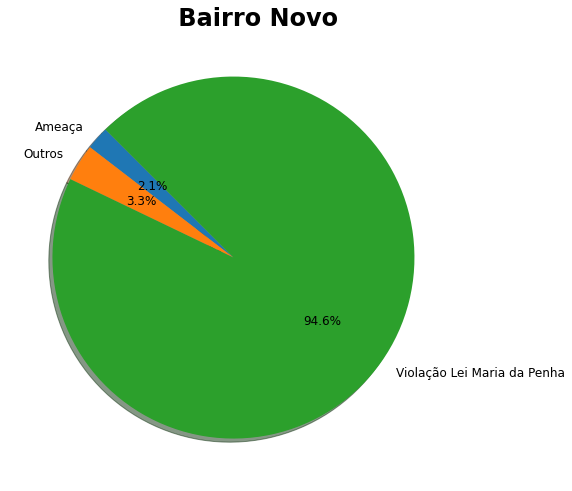

In [285]:
fig1, ax1 = plt.subplots(figsize=(8,8))  

x = bairro_novo_grouped_pie['QTDE']
labels=bairro_novo_grouped_pie['DESCRICAO1']

colors = ['#ff0000','#66b3ff','#99ff99','#ffcc99']
ax1.pie(x, labels=labels, autopct='%.1f%%',startangle=135, shadow=True,textprops={'fontsize': 12})
ax1.set_title("      Bairro Novo",fontdict={'fontsize': 24, 'fontweight': 'bold'})

fig1.tight_layout()

plt.show()

In [283]:
bairro_novo_grouped = bairro_novo.groupby(['periodo', 'DESCRICAO1'])['QTDE'].count().reset_index()
bairro_novo_grouped

,periodo,DESCRICAO1,QTDE
0,2019-01,Abuso de incapazes,1
1,2019-01,Maus tratos à pessoas,1
2,2019-01,Violação de Medida Protetiva Lei Maria da Penha,6
3,2019-02,Ameaça,1
4,2019-02,Violação de Medida Protetiva Lei Maria da Penha,2
5,2019-03,Ameaça,2
6,2019-03,Violação de Medida Protetiva Lei Maria da Penha,8
7,2019-04,Violação de Medida Protetiva Lei Maria da Penha,7
8,2019-05,Violação de Medida Protetiva Lei Maria da Penha,8
9,2019-06,Violação de Medida Protetiva Lei Maria da Penha,4


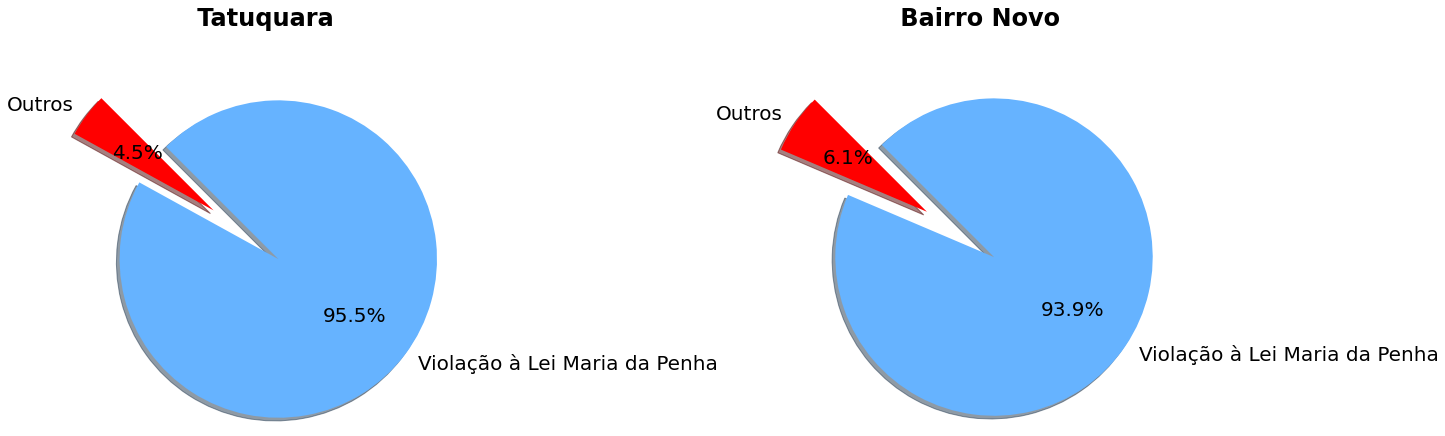

In [40]:
fig1, ax1 = plt.subplots(1, 2, figsize=(20,40))  # 
x = tatuquara_grouped_pie['QTDE']
labels=tatuquara_grouped_pie['DESCRICAO1']
colors = ['#ff0000','#66b3ff','#99ff99','#ffcc99']
explode = (0.21, 0.3)
ax1[0].pie(x, labels=labels, autopct='%.1f%%',startangle=135, explode=explode, colors=colors, shadow=True,textprops={'fontsize': 20})
ax1[0].set_title("      Tatuquara",fontdict={'fontsize': 24, 'fontweight': 'bold'})
ax1[1].pie(bairro_novo_grouped_pie['QTDE'], labels=bairro_novo_grouped_pie['DESCRICAO1'], colors=colors, autopct='%.1f%%',startangle=135, explode=explode, shadow=True,textprops={'fontsize': 20})
ax1[1].set_title("      Bairro Novo",fontdict={'fontsize': 24, 'fontweight': 'bold'})
fig1.tight_layout()
# fig1.suptitle('Public Opinion on CTQ-measures', fontsize=20, y=1.07, fontweight='bold', x=0.37)
plt.savefig('bairro_novo_tatuquara_pie.png')
plt.show()

In [41]:
lei_maria_penha_bairro_novo = bairro_novo_grouped[bairro_novo_grouped['DESCRICAO1'] == 'Violação à Lei Maria da Penha']
# lei_maria_penha.set_index('periodo').plot()
lei_maria_penha_bairro_novo['taxa'] = lei_maria_penha_bairro_novo.apply(lambda x: x['QTDE']/124330 * 100000,axis=1)
lei_maria_penha_bairro_novo

# df.apply(lambda x: [1, 2], axis=1)

<ipython-input-41-320ef445e087>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lei_maria_penha_bairro_novo['taxa'] = lei_maria_penha_bairro_novo.apply(lambda x: x['QTDE']/124330 * 100000,axis=1)


,periodo,DESCRICAO1,QTDE,taxa
2,2019-01,Violação à Lei Maria da Penha,6,4.825867
4,2019-02,Violação à Lei Maria da Penha,2,1.608622
6,2019-03,Violação à Lei Maria da Penha,8,6.434489
7,2019-04,Violação à Lei Maria da Penha,7,5.630178
8,2019-05,Violação à Lei Maria da Penha,8,6.434489
9,2019-06,Violação à Lei Maria da Penha,4,3.217244
12,2019-07,Violação à Lei Maria da Penha,4,3.217244
13,2019-08,Violação à Lei Maria da Penha,8,6.434489
15,2019-09,Violação à Lei Maria da Penha,3,2.412933
17,2019-10,Violação à Lei Maria da Penha,4,3.217244


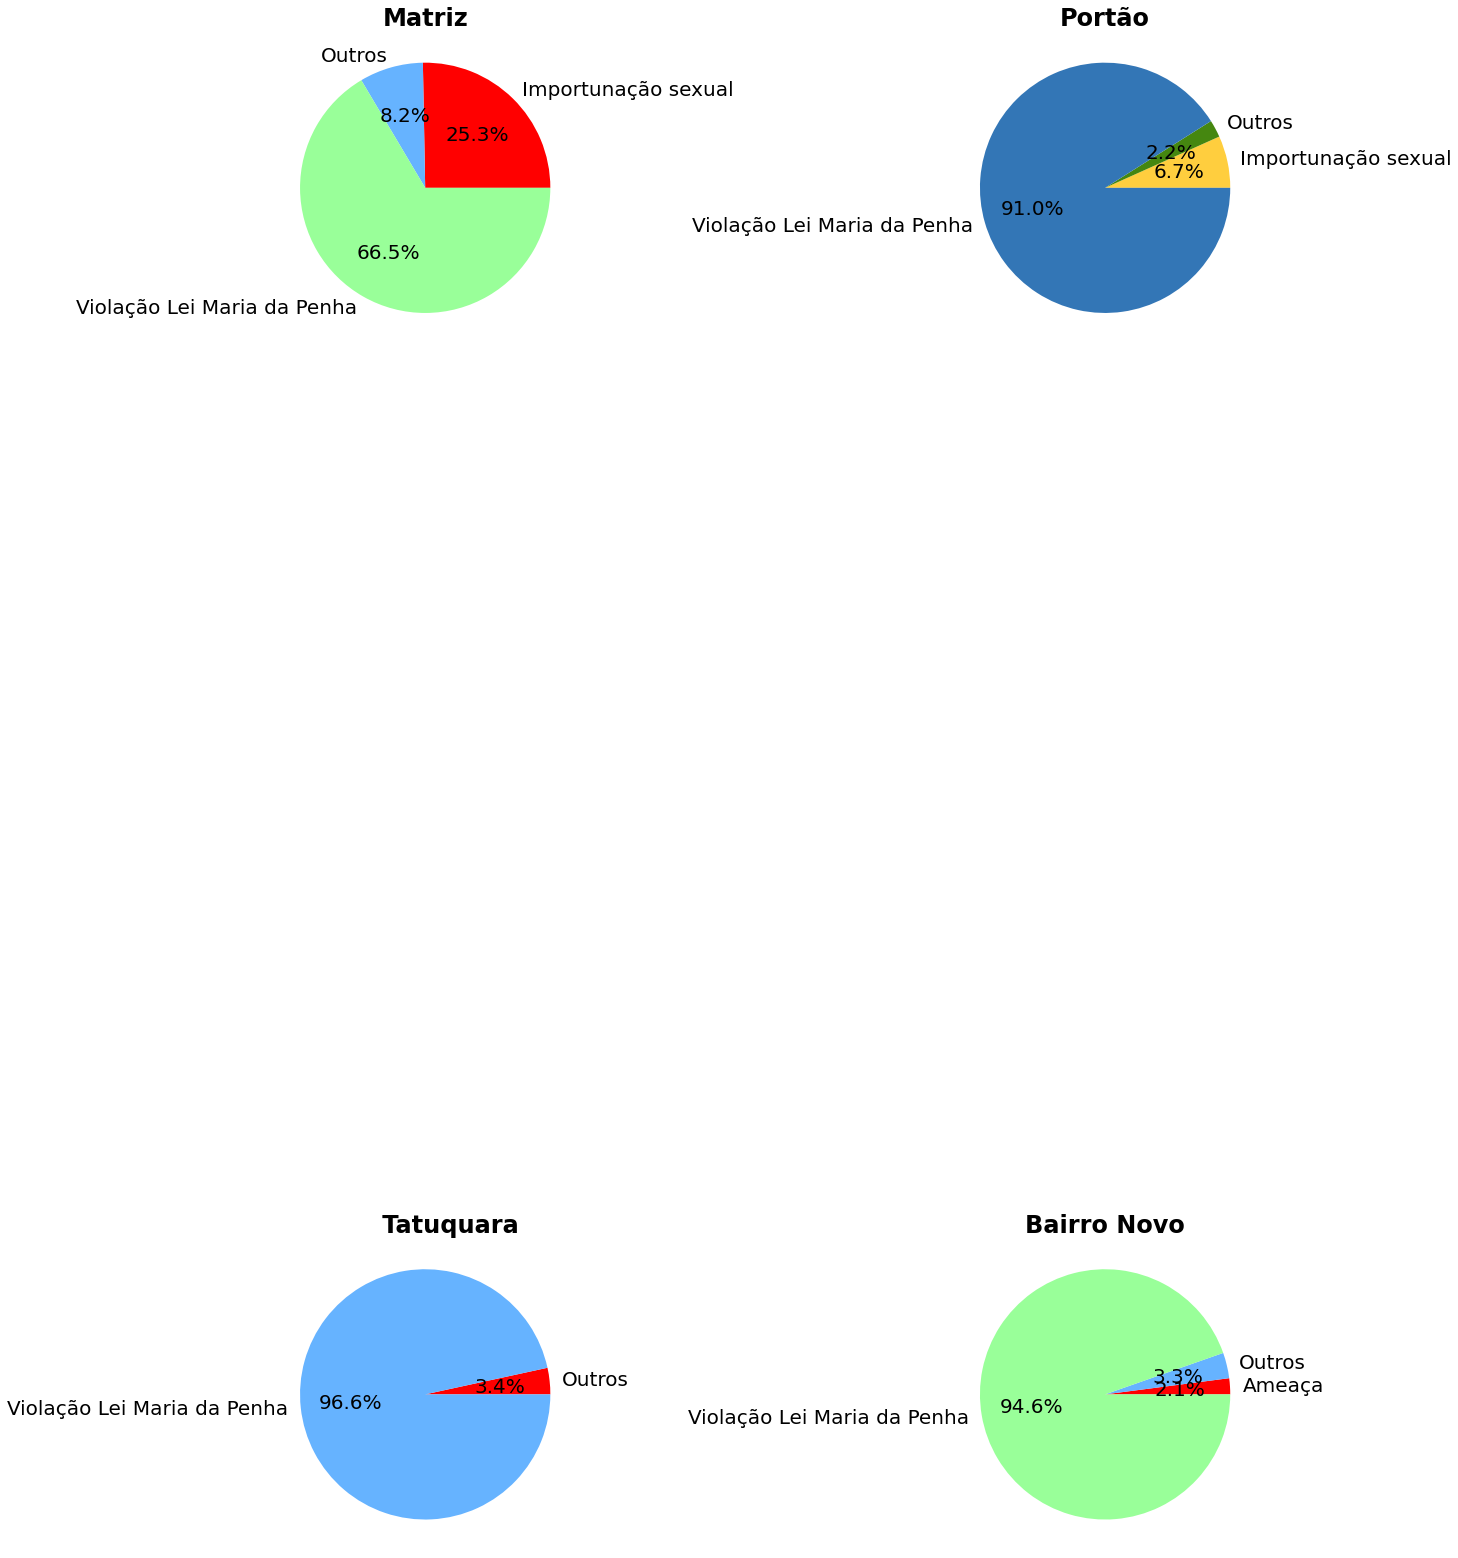

In [290]:
fig, ax = plt.subplots(2, 2, figsize=(20,20))  # 
# x = tatuquara_grouped_pie['QTDE']
# labels=tatuquara_grouped_pie['DESCRICAO1']

# MATRIZ
colors = ['#ff0000','#66b3ff','#99ff99','#ffcc99']
labels_matriz = matriz_grouped_pie['DESCRICAO1']
# explode = (0,0,0,0,0,0,0.1) 
ax[0,0].pie(matriz_grouped_pie['QTDE'], labels=labels_matriz ,autopct='%.1f%%', startangle=360, colors=colors, textprops={'fontsize': 20})
ax[0,0].set_title("Matriz",fontdict={'fontsize': 24, 'fontweight': 'bold'})
# ax[0,0].text(0, 0.7, 'Violação da Lei Maria da Penha',fontsize=16)
# ax[0,0].text(0.2, 0, 'Importunação sexual',fontsize=16)


# PORTÃO
labels_portao = portao_grouped_pie['DESCRICAO1']
ax[0,1].pie(portao_grouped_pie['QTDE'], labels=labels_portao ,autopct='%.1f%%',startangle=360, colors=colors1, textprops={'fontsize': 20})
ax[0,1].set_title('Portão', fontdict={'fontsize': 24, 'fontweight': 'bold'})
# ax[0,0].text(0, 0.7, 'Violação da Lei Maria da Penha',fontsize=16)

# TATUQUARA

# explode = (0.1,0,0.1,0,0.1,0,0.1) 
labels_tatuquara = tatuquara_grouped_pie['DESCRICAO1']
ax[1,0].pie(tatuquara_grouped_pie['QTDE'], labels=labels_tatuquara, autopct='%.1f%%',startangle=360, colors=colors, textprops={'fontsize': 20})
ax[1,0].set_title("      Tatuquara",fontdict={'fontsize': 24, 'fontweight': 'bold'})
# ax[1,0].text(0.3, 0,'96.6%',fontsize=30, ha='right')


# BAIRRO NOVO

labels_bairro_novo = bairro_novo_grouped_pie['DESCRICAO1']
ax[1,1].pie(bairro_novo_grouped_pie['QTDE'], labels=labels_bairro_novo, autopct='%.1f%%',startangle=360,  colors=colors,textprops={'fontsize': 20})
ax[1,1].set_title("Bairro Novo",fontdict={'fontsize': 24, 'fontweight': 'bold'})

fig.tight_layout()
plt.show()

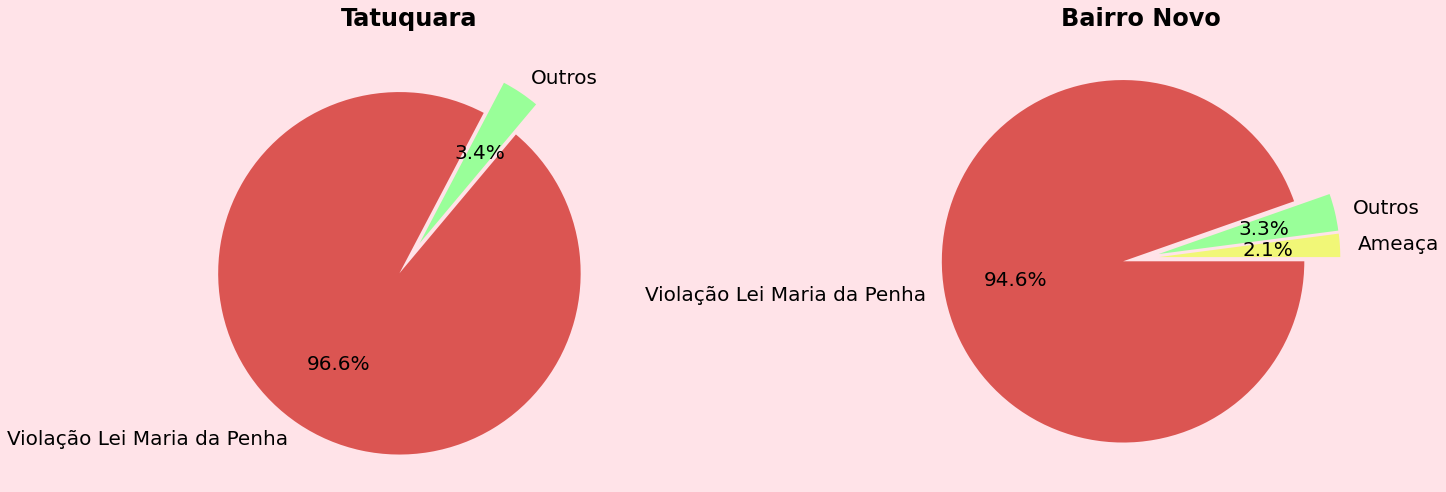

In [360]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))  # 
# x = tatuquara_grouped_pie['QTDE']
# labels=tatuquara_grouped_pie['DESCRICAO1']

# TATUQUARA
colors = ['#f1f777','#99ff99','#DB5552']
colors2 = ['#99ff99','#DB5552'] 
labels_tatuquara = tatuquara_grouped_pie['DESCRICAO1']
explode = (0.1,0.1,0.1) 
explode2 = (0.1,0.1) 

ax[0].pie(tatuquara_grouped_pie['QTDE'], labels=labels_tatuquara ,autopct='%.1f%%', startangle=50, colors=colors2,explode=explode2, textprops={'fontsize': 20})
ax[0].set_title("Tatuquara",fontdict={'fontsize': 24, 'fontweight': 'bold'})

# BAIRRO NOVO
labels_bairro_novo = bairro_novo_grouped_pie['DESCRICAO1']
ax[1].pie(bairro_novo_grouped_pie['QTDE'], labels=labels_bairro_novo ,autopct='%.1f%%',startangle=0, colors=colors,explode=explode, textprops={'fontsize': 20})
ax[1].set_title('Bairro Novo', fontdict={'fontsize': 24, 'fontweight': 'bold'})

# # 

# # explode = (0.1,0,0.1,0,0.1,0,0.1) 
#
# ax[1,0].pie(['QTDE'], labels=, autopct='%.1f%%',startangle=360, colors=colors, textprops={'fontsize': 20})
# ax[1,0].set_title("      ",fontdict={'fontsize': 24, 'fontweight': 'bold'})
# # ax[1,0].text(0.3, 0,'96.6%',fontsize=30, ha='right')



fig.set_facecolor('#ffe3e8')
fig.tight_layout()
plt.show()

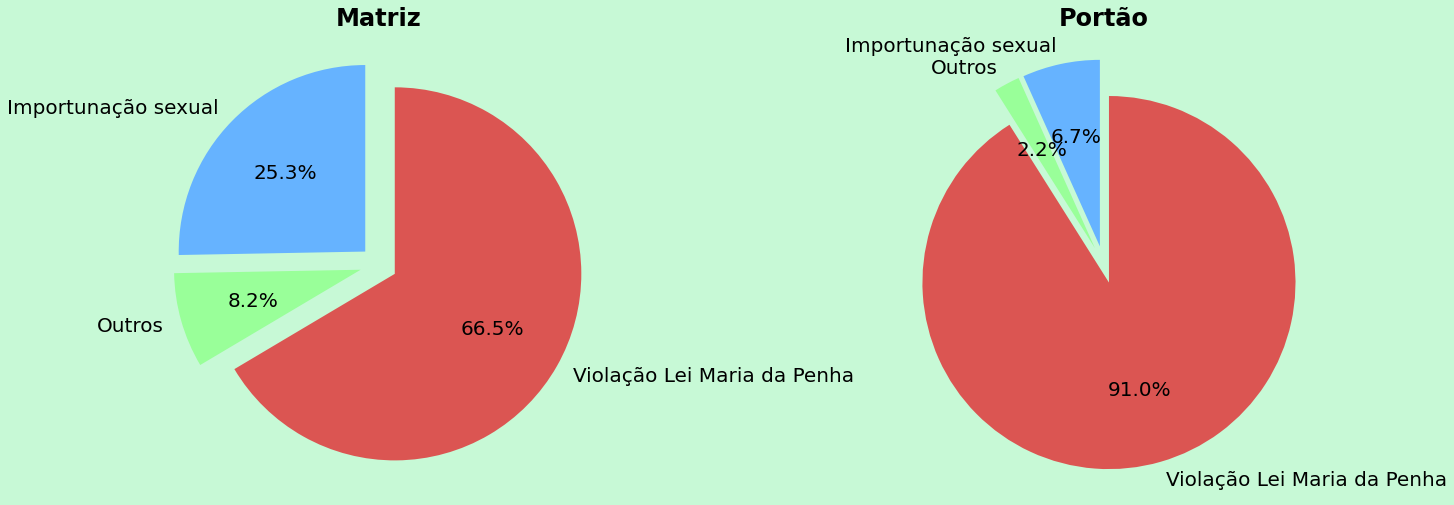

In [325]:
fig, ax = plt.subplots(1, 2, figsize=(20,20))  # 
# x = tatuquara_grouped_pie['QTDE']
# labels=tatuquara_grouped_pie['DESCRICAO1']

# MATRIZ
colors = ['#66b3ff','#99ff99','#DB5552']
labels_matriz = matriz_grouped_pie['DESCRICAO1']
explode = (0.1,0.1,0.1) 
ax[0].pie(matriz_grouped_pie['QTDE'], labels=labels_matriz ,autopct='%.1f%%', startangle=90, colors=colors,explode=explode, textprops={'fontsize': 20})
ax[0].set_title("Matriz",fontdict={'fontsize': 24, 'fontweight': 'bold'})
# ax[0,0].text(0, 0.7, 'Violação da Lei Maria da Penha',fontsize=16)
# ax[0,0].text(0.2, 0, 'Importunação sexual',fontsize=16)


# PORTÃO
labels_portao = portao_grouped_pie['DESCRICAO1']
ax[1].pie(portao_grouped_pie['QTDE'], labels=labels_portao ,autopct='%.1f%%',startangle=90, colors=colors,explode=explode, textprops={'fontsize': 20})
ax[1].set_title('Portão', fontdict={'fontsize': 24, 'fontweight': 'bold'})
# ax[0,0].text(0, 0.7, 'Violação da Lei Maria da Penha',fontsize=16)

# # TATUQUARA

# # explode = (0.1,0,0.1,0,0.1,0,0.1) 
# labels_tatuquara = tatuquara_grouped_pie['DESCRICAO1']
# ax[1,0].pie(tatuquara_grouped_pie['QTDE'], labels=labels_tatuquara, autopct='%.1f%%',startangle=360, colors=colors, textprops={'fontsize': 20})
# ax[1,0].set_title("      Tatuquara",fontdict={'fontsize': 24, 'fontweight': 'bold'})
# # ax[1,0].text(0.3, 0,'96.6%',fontsize=30, ha='right')


# # BAIRRO NOVO

# labels_bairro_novo = bairro_novo_grouped_pie['DESCRICAO1']
# ax[1,1].pie(bairro_novo_grouped_pie['QTDE'], labels=labels_bairro_novo, autopct='%.1f%%',startangle=360,  colors=colors,textprops={'fontsize': 20})
# ax[1,1].set_title("Bairro Novo",fontdict={'fontsize': 24, 'fontweight': 'bold'})
fig.set_facecolor('#c7f9d6')
fig.tight_layout()
plt.show()capt

# Agrupamento

In [363]:
# lei_maria_penha_bairro_novo = lei_maria_penha_bairro_novo['taxa']
lei_maria_penha_bairro_novo

,periodo,DESCRICAO1,QTDE,taxa
2,2019-01,Violação à Lei Maria da Penha,6,4.825867
4,2019-02,Violação à Lei Maria da Penha,2,1.608622
6,2019-03,Violação à Lei Maria da Penha,8,6.434489
7,2019-04,Violação à Lei Maria da Penha,7,5.630178
8,2019-05,Violação à Lei Maria da Penha,8,6.434489
9,2019-06,Violação à Lei Maria da Penha,4,3.217244
12,2019-07,Violação à Lei Maria da Penha,4,3.217244
13,2019-08,Violação à Lei Maria da Penha,8,6.434489
15,2019-09,Violação à Lei Maria da Penha,3,2.412933
17,2019-10,Violação à Lei Maria da Penha,4,3.217244


# AGRUPAR TODAS AS REGIONAIS EM UM DATAFRAME

Alterar o nome da coluna taxa para o nome da regional

In [27]:
matriz = violencia[df['REGIONAL'] == 'MATRIZ']
portao = violencia[df['REGIONAL'] == 'PORTÃO']
bairro_novo = violencia[df['REGIONAL'] == 'BAIRRO NOVO']
tatuquara = violencia[df['REGIONAL'] == 'TATUQUARA']

matriz = matriz[matriz['DESCRICAO1'] == 'Violação de Medida Protetiva Lei Maria da Penha']
portao = portao[portao['DESCRICAO1'] == 'Violação de Medida Protetiva Lei Maria da Penha']
bairro_novo = bairro_novo[bairro_novo['DESCRICAO1'] == 'Violação de Medida Protetiva Lei Maria da Penha']
tatuquara = tatuquara[tatuquara['DESCRICAO1'] == 'Violação de Medida Protetiva Lei Maria da Penha']

matriz_grouped = matriz.groupby('periodo')['QTDE'].count().reset_index(name='Matriz')
portao_grouped = portao.groupby('periodo')['QTDE'].count().reset_index(name='Portão')
bairro_novo_grouped = bairro_novo.groupby('periodo')['QTDE'].count().reset_index(name='Bairro Novo')
tatuquara_grouped = tatuquara.groupby('periodo')['QTDE'].count().reset_index(name='Tatuquara')

matriz_grouped = matriz_grouped.set_index('periodo')
portao_grouped = portao_grouped.set_index('periodo')
bairro_novo_grouped = bairro_novo_grouped.set_index('periodo')
tatuquara_grouped = tatuquara_grouped.set_index('periodo')






matriz_grouped['Matriz'] = matriz_grouped.apply(lambda x: x['Matriz']/202304 * 100000,axis=1)
portao_grouped['Portão'] = portao_grouped.apply(lambda x: x['Portão']/194675 * 100000,axis=1)
bairro_novo_grouped['Bairro Novo'] = bairro_novo_grouped.apply(lambda x: x['Bairro Novo']/124330 * 100000,axis=1)
tatuquara_grouped['Tatuquara'] = tatuquara_grouped.apply(lambda x: x['Tatuquara']/46149 * 100000,axis=1)

<ipython-input-27-68b55d46b799>:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  matriz = violencia[df['REGIONAL'] == 'MATRIZ']
<ipython-input-27-68b55d46b799>:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  portao = violencia[df['REGIONAL'] == 'PORTÃO']
<ipython-input-27-68b55d46b799>:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  bairro_novo = violencia[df['REGIONAL'] == 'BAIRRO NOVO']
<ipython-input-27-68b55d46b799>:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  tatuquara = violencia[df['REGIONAL'] == 'TATUQUARA']


In [32]:
print(len(matriz_grouped), len(portao_grouped), len(bairro_novo_grouped), len(tatuquara_grouped))

30 30 30 30


In [40]:
grouped = matriz_grouped.merge(portao_grouped, how='left', left_index=True, right_index=True)
grouped = grouped.merge(bairro_novo_grouped, how='left', left_index=True, right_index=True)
grouped = grouped.merge(tatuquara_grouped, how='left', left_index=True, right_index=True)
grouped.head()

# df_merge = renda.merge(df_regionais, how='left', left_on='Bairros', right_on='Bairro', suffixes=(False, False))

,Matriz,Portão,Bairro Novo,Tatuquara
periodo,,,,
2019-01,0.494306,2.568383,4.825867,8.667577
2019-02,2.965834,1.027353,1.608622,6.500683
2019-03,0.988611,2.568383,6.434489,8.667577
2019-04,2.965834,2.054707,5.630178,10.834471
2019-05,4.943056,3.082060,6.434489,4.333788


In [68]:
matriz_antes = grouped['Matriz'].where(grouped.index <= '2020-03').mean()
matriz_depois = grouped['Matriz'].where(grouped.index > '2020-03').mean()

portao_antes = grouped['Portão'].where(grouped.index <= '2020-03').mean()
portao_depois = grouped['Portão'].where(grouped.index > '2020-03').mean()

bairro_novo_antes = grouped['Bairro Novo'].where(grouped.index <= '2020-03').mean()
bairro_novo_depois = grouped['Bairro Novo'].where(grouped.index > '2020-03').mean()

tatuquara_antes = grouped['Tatuquara'].where(grouped.index <= '2020-03').mean()
tatuquara_depois = grouped['Tatuquara'].where(grouped.index > '2020-03').mean()


# print(f"Média Antes e Depois \nMatriz: {matriz_antes} - {matriz_depois}\nPortão: {portao_antes} - {portao_depois}\nBairro Novo: {bairro_novo_antes} - {bairro_novo_depois}\nTatuquara: {tatuquara_antes} - {tatuquara_depois}" )

grouped["Média Matriz"] = grouped.index.to_series().apply(lambda x: matriz_antes if x <= pd.Period('2020-03') else matriz_depois)
grouped["Média Portão"] = grouped.index.to_series().apply(lambda x: portao_antes if x <= pd.Period('2020-03') else portao_depois)
grouped["Média Bairro Novo"] = grouped.index.to_series().apply(lambda x: bairro_novo_antes if x <= pd.Period('2020-03') else bairro_novo_depois)
grouped["Média Tatuquara"] = grouped.index.to_series().apply(lambda x: tatuquara_antes if x <= pd.Period('2020-03') else tatuquara_depois)

In [71]:
print(f"Média Antes e Depois \nMatriz: {matriz_antes} - {matriz_depois}\nPortão: {portao_antes} - {portao_depois}\nBairro Novo: {bairro_novo_antes} - {bairro_novo_depois}\nTatuquara: {tatuquara_antes} - {tatuquara_depois}" )


Média Antes e Depois 
Matriz: 1.9113149847094804 - 1.8124538648107142
Portão: 2.260177218440991 - 1.9177261247378108
Bairro Novo: 4.718625164213518 - 7.560524410842115
Tatuquara: 11.123390178190931 - 13.434743981451383


In [80]:
fig = figure(title='Violação de Medida Protetiva Lei Maria da Penha - 2019 a 2021',
           x_axis_type="datetime",
           x_axis_label="Data", 
           y_axis_label="Taxa de Ocorrência por 100 mil habitantes",
           plot_width=1600, plot_height=800)

x = grouped.index

fig.line(x,grouped['Bairro Novo'],line_width=6, color="black", legend_label='Bairro Novo',line_dash="6 2")
fig.line(x,grouped['Média Bairro Novo'],line_width=2, color="black", legend_label='Média Bairro Novo')

fig.line(x,grouped['Tatuquara'],line_width=6, color="green", legend_label='Tatuquara',line_dash="6 2")
fig.line(x,grouped['Média Tatuquara'],line_width=2, color="green", legend_label='Média Tatuquara')

fig.line(x,grouped['Matriz'],line_width=6, color="dimgray", legend_label='Matriz',line_dash="6 2")
fig.line(x,grouped['Média Matriz'],line_width=2, color="dimgray", legend_label='Média Matriz')

fig.line(x,grouped['Portão'],line_width=6, color="mediumvioletred", legend_label='Portão',line_dash="6 2")
fig.line(x,grouped['Média Portão'],line_width=2, color="mediumvioletred", legend_label='Média Portão')


start_pandemia = dt(2020, 3, 16)
start = dt(2019, 1, 1)

sem_pandemia = BoxAnnotation(left=start, right=start_pandemia, fill_alpha=0.1, fill_color='green')
pandemia = BoxAnnotation(left=start_pandemia, fill_alpha=0.05, fill_color='red')
daylight_savings_start = Span(location=start_pandemia,
                              dimension='height', line_color='red',
                              line_dash='dashed', line_width=3)
fig.add_layout(daylight_savings_start)

fig.add_layout(sem_pandemia)
fig.add_layout(pandemia)

fig.title.text_font_size = '24px'

fig.add_layout(Title(text="Linha seccionada na vertical indica, oficialmente, o início do isolamento",text_font_size='24px', align="left"), "below")

fig.legend.border_line_width = 3
fig.legend.border_line_color = "dimgray"
fig.legend.border_line_alpha = 1
fig.legend.background_fill_color = "darkgray"
fig.legend.background_fill_alpha = 0.03


fig.xaxis.formatter=DatetimeTickFormatter(
        hours=["%B %Y"],
        days=["%B %Y"],
        months=["%B %Y"],
        years=["%B %Y"],
    )
show(fig)

In [82]:
grouped

,Matriz,Portão,Bairro Novo,Tatuquara,Média Matriz,Média Portão,Média Bairro Novo,Média Tatuquara
periodo,,,,,,,,
2019-01,0.494306,2.568383,4.825867,8.667577,1.911315,2.260177,4.718625,11.123390
2019-02,2.965834,1.027353,1.608622,6.500683,1.911315,2.260177,4.718625,11.123390
2019-03,0.988611,2.568383,6.434489,8.667577,1.911315,2.260177,4.718625,11.123390
2019-04,2.965834,2.054707,5.630178,10.834471,1.911315,2.260177,4.718625,11.123390
2019-05,4.943056,3.082060,6.434489,4.333788,1.911315,2.260177,4.718625,11.123390
2019-06,2.471528,5.650443,3.217244,13.001365,1.911315,2.260177,4.718625,11.123390
2019-07,2.965834,2.568383,3.217244,10.834471,1.911315,2.260177,4.718625,11.123390
2019-08,0.494306,1.027353,6.434489,8.667577,1.911315,2.260177,4.718625,11.123390
2019-09,2.471528,3.082060,2.412933,6.500683,1.911315,2.260177,4.718625,11.123390
